In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
epochs = 10

transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.1307,), (0.3081,))  # среднее и стандартное отклонение по каналу
])

In [3]:
train_dataset = datasets.MNIST(root='../data/MNIST', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='../data/MNIST', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 9.45MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 245kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.54MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.56MB/s]


In [4]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

train_accuracies = []
test_accuracies = []

Epoch 1: Train Acc = 0.9289, Test Acc = 0.9620
Epoch 2: Train Acc = 0.9694, Test Acc = 0.9732
Epoch 3: Train Acc = 0.9791, Test Acc = 0.9745
Epoch 4: Train Acc = 0.9844, Test Acc = 0.9794
Epoch 5: Train Acc = 0.9889, Test Acc = 0.9782
Epoch 6: Train Acc = 0.9915, Test Acc = 0.9809
Epoch 7: Train Acc = 0.9933, Test Acc = 0.9785
Epoch 8: Train Acc = 0.9948, Test Acc = 0.9807
Epoch 9: Train Acc = 0.9957, Test Acc = 0.9795
Epoch 10: Train Acc = 0.9957, Test Acc = 0.9758


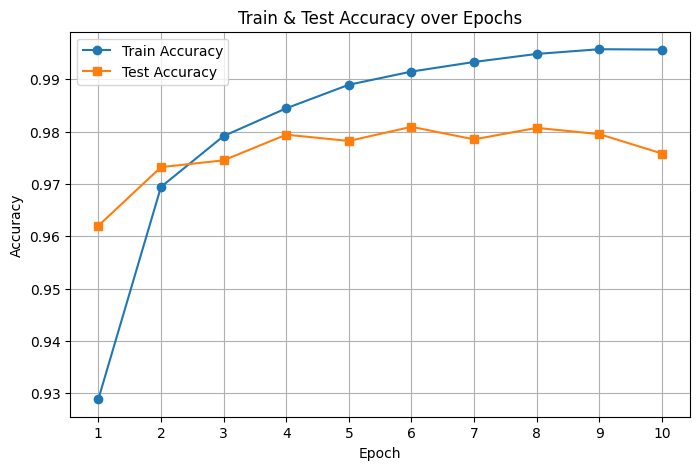

In [5]:
for epoch in range(1, epochs+1):
    # Обучение
    model.train()
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_acc = correct_train / total_train
    train_accuracies.append(train_acc)

    # Тестирование
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_acc = correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

# Cell 8: Построение графика точности
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies,  marker='s', label='Test Accuracy')
plt.title('Train & Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, epochs+1))
plt.legend()
plt.grid(True)
plt.show()
